In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [8]:
# Deleting unwanted columns in model building

del df["street"]
del df["city"]
del df["country"]
del df["date"]  

In [9]:
# Preparing the Statezip column data into more useful data
import numpy as np
lis = []
for i in df["statezip"]:
    lis.append(i[2:])
    
arr = np.array(lis,dtype=np.int64)
df["statezip"] = arr

In [10]:
df.drop(np.where(df["price"]==0)[0],axis=0,inplace=True)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,98079.397056
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,53.048784
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000


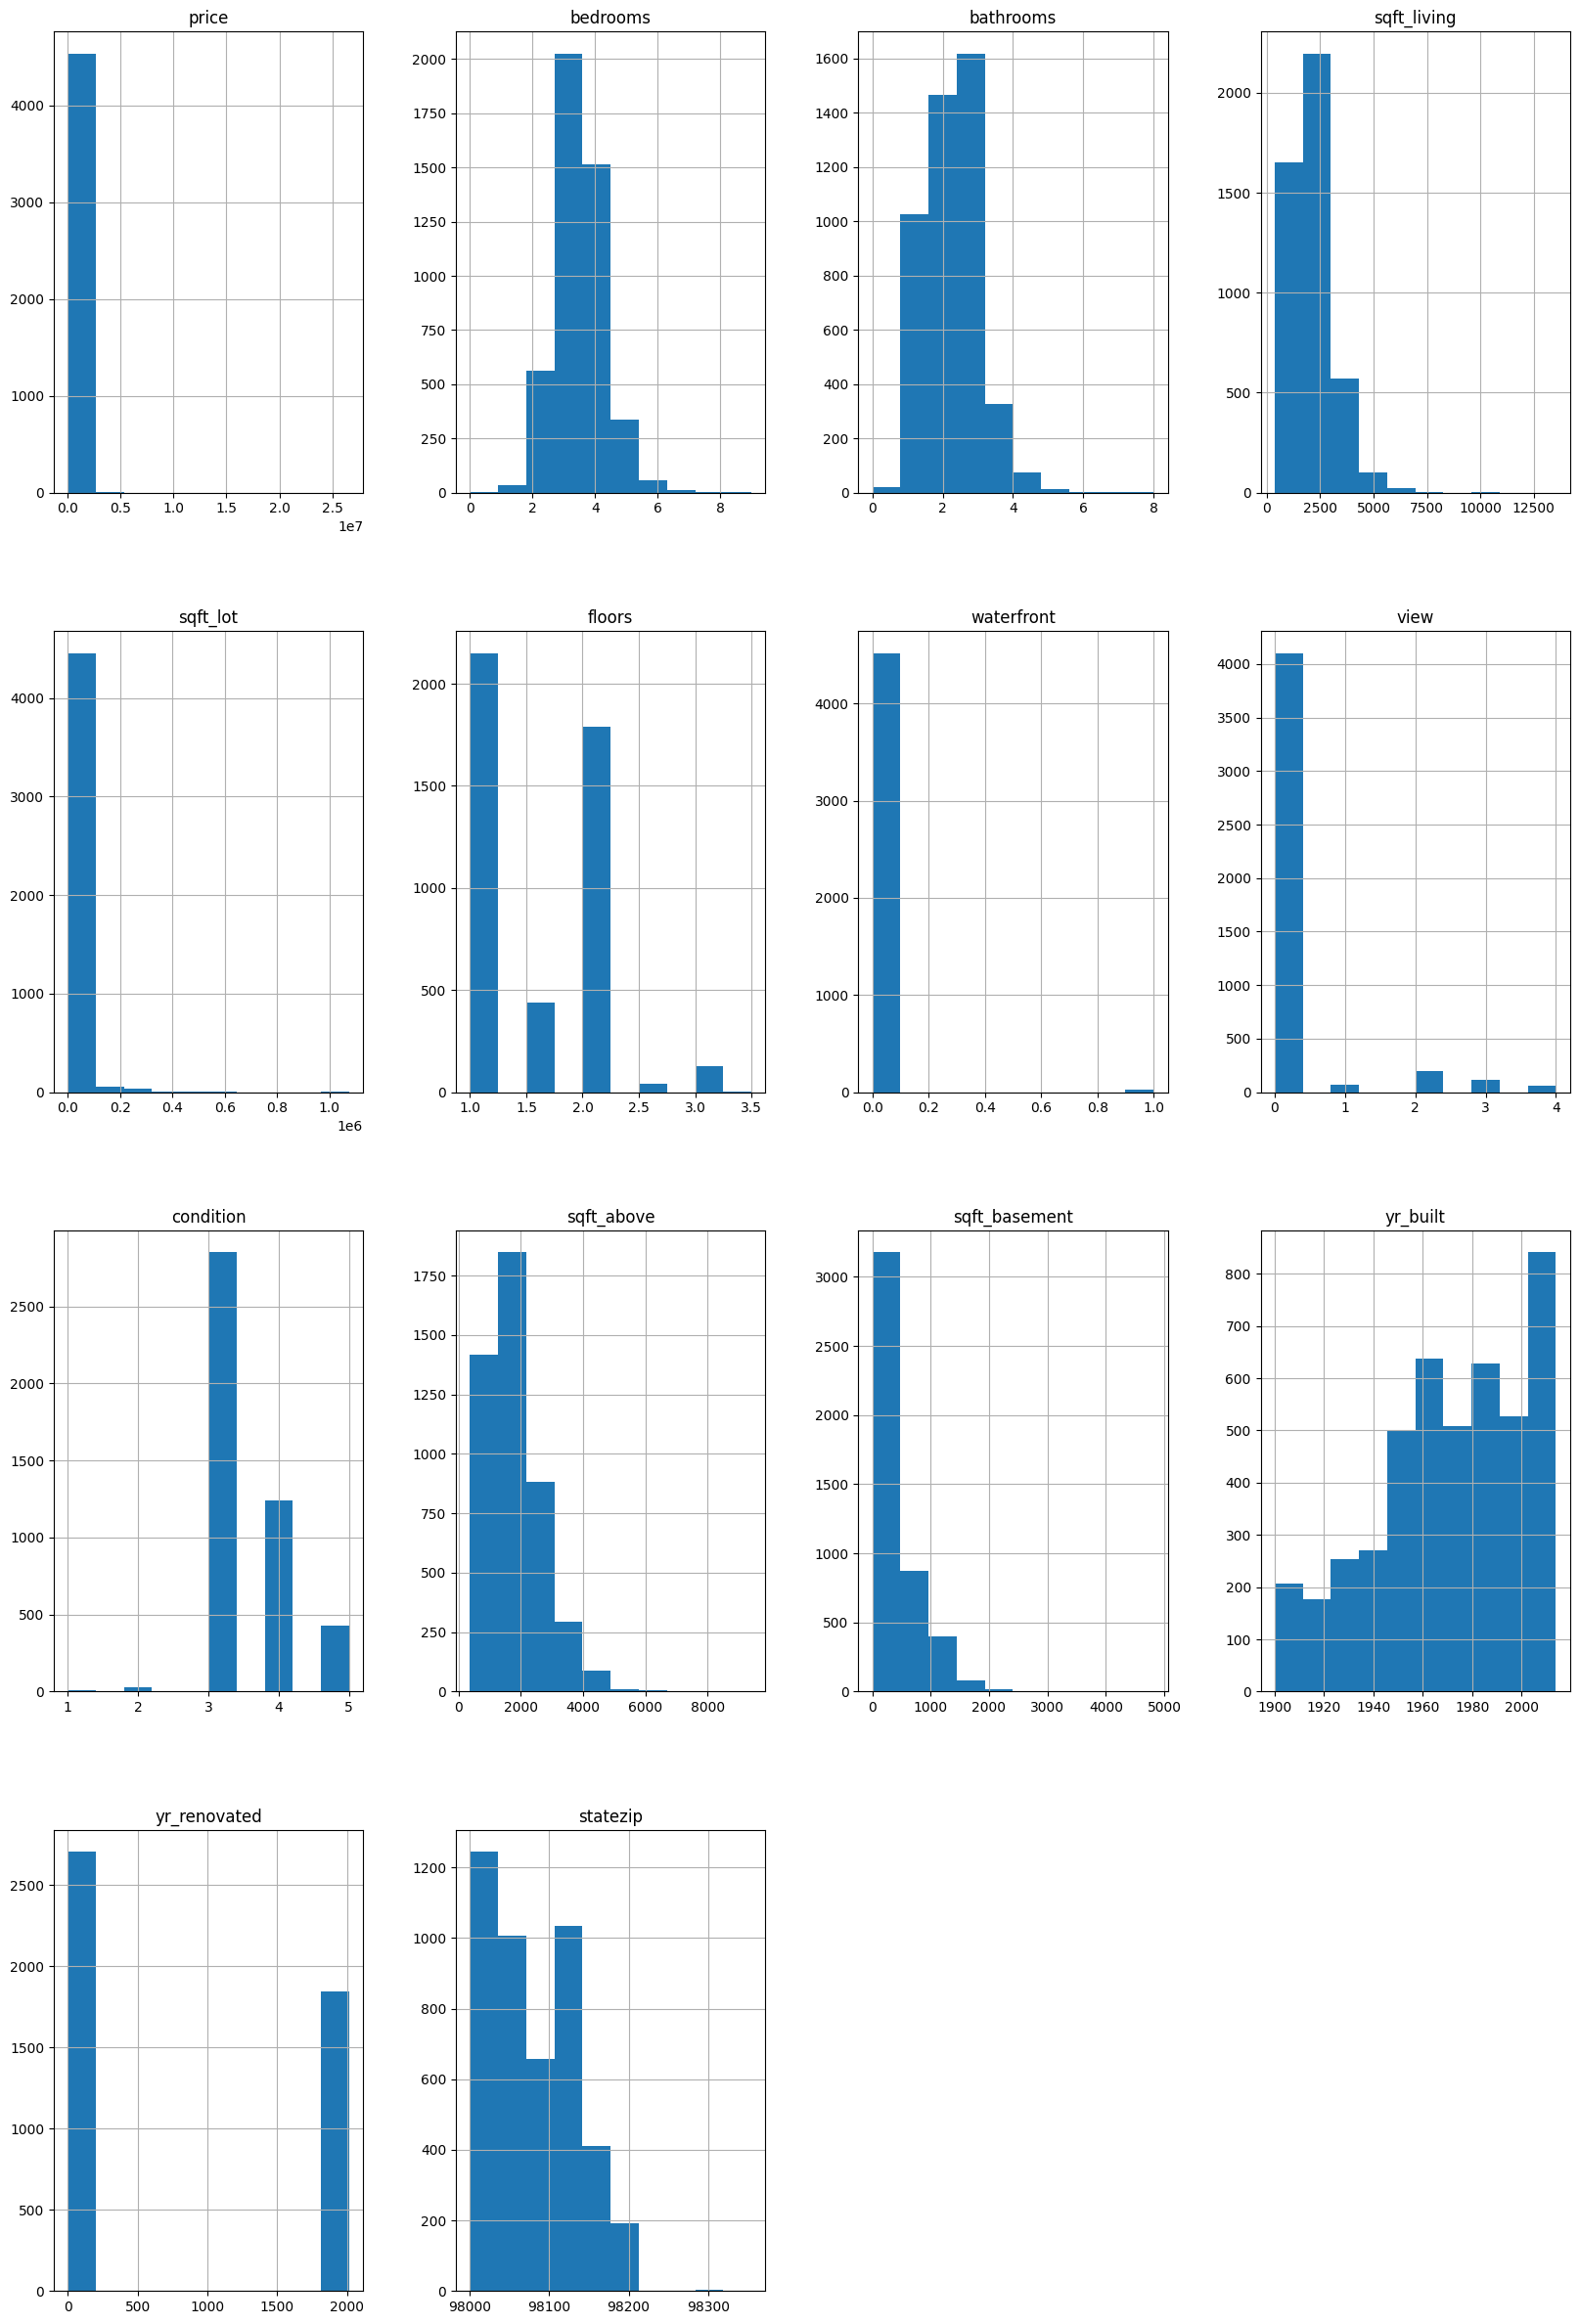

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(20,30));

<Figure size 2500x500 with 0 Axes>

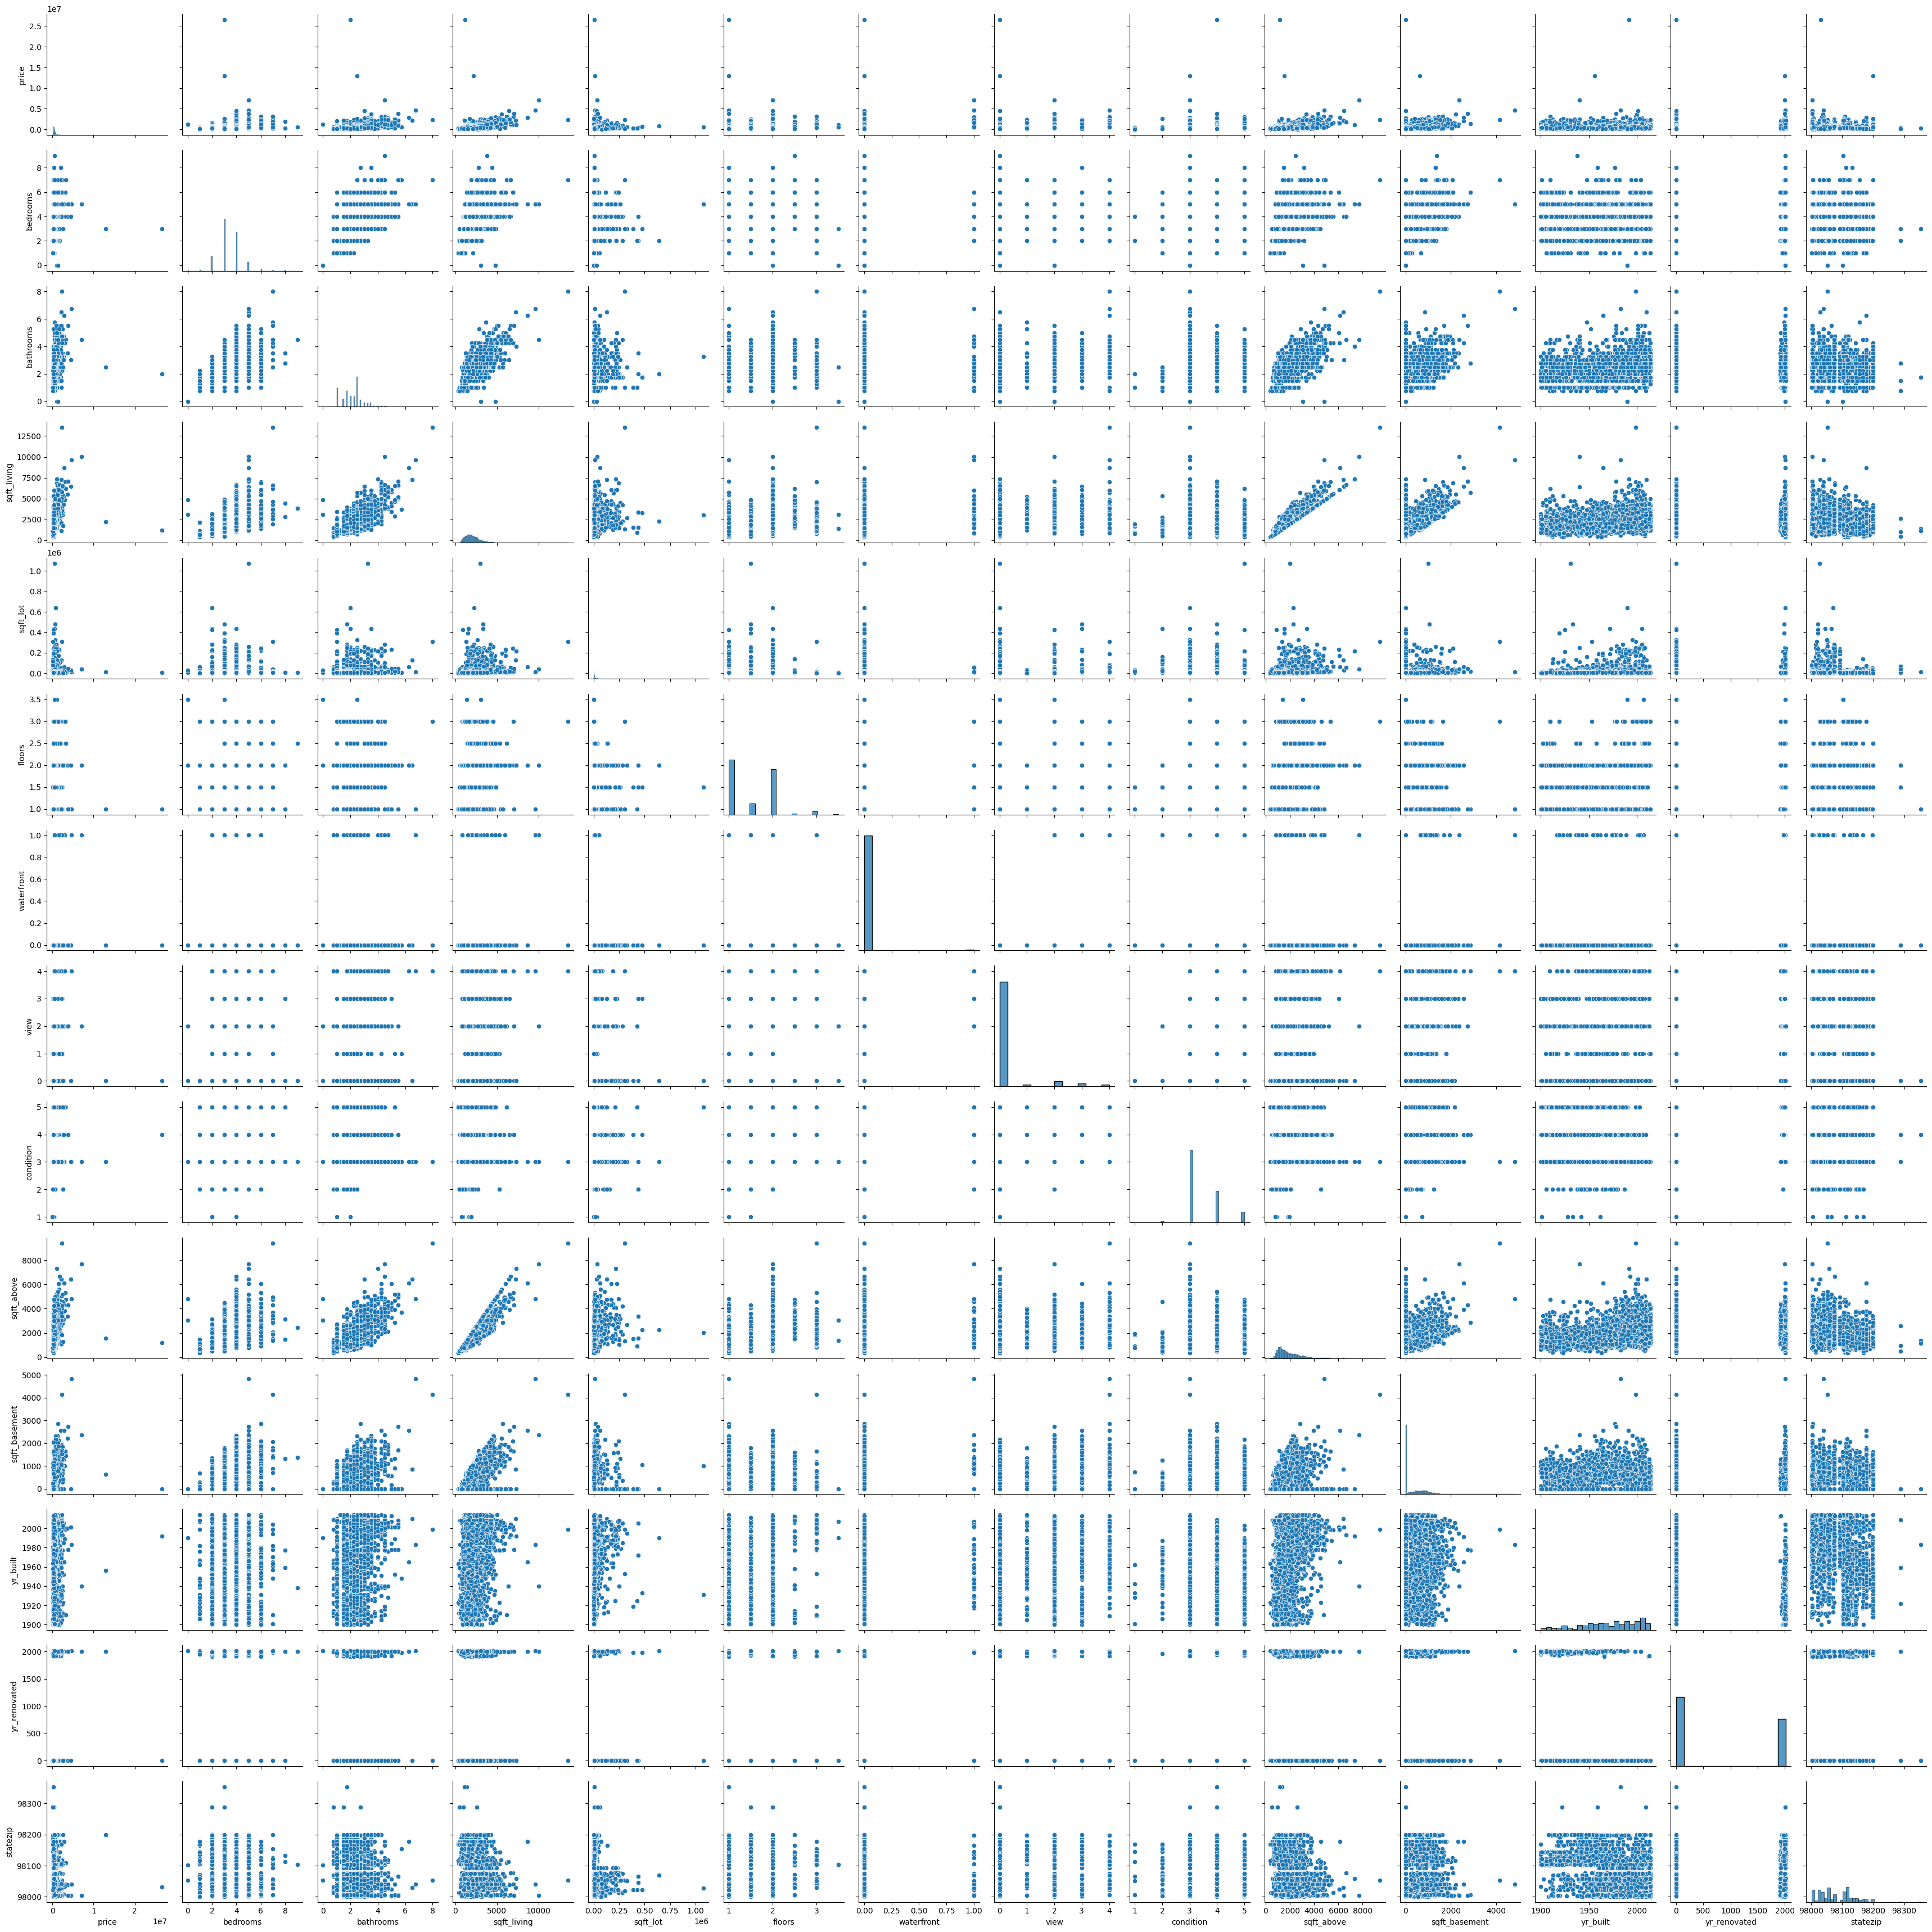

In [15]:
plt.figure(figsize=(25, 5))
sns.pairplot(df)
plt.show()

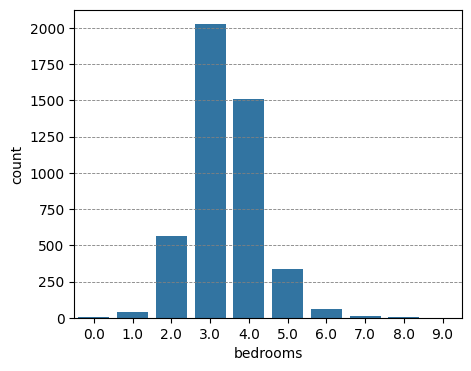

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

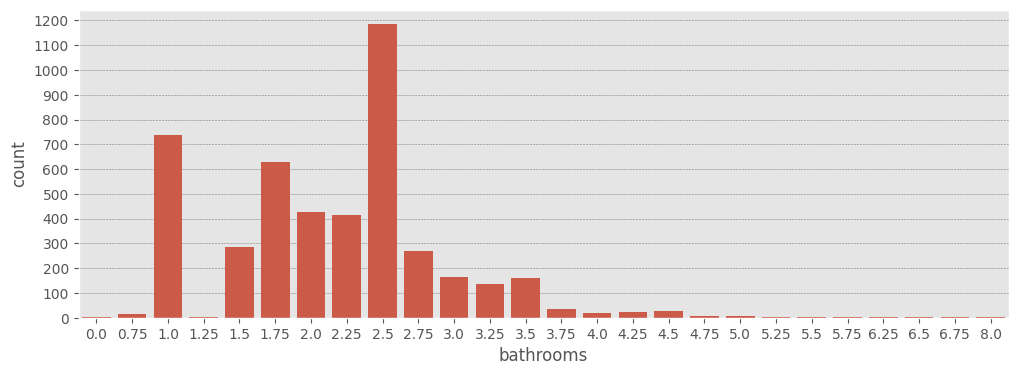

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

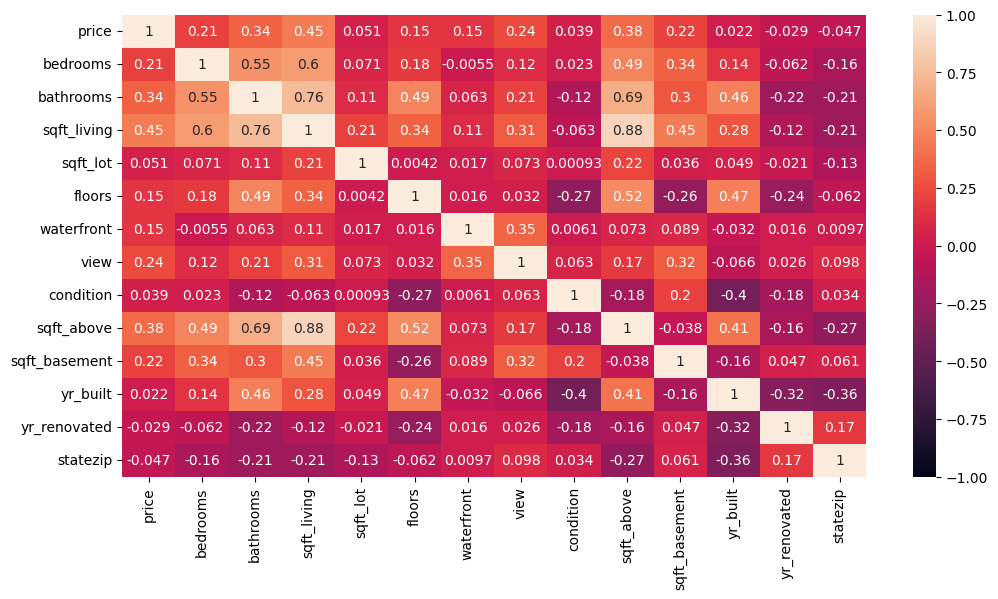

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [12]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034,-0.046944
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219,-0.157555
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160,-0.208310
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589,-0.211295
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068,-0.132613
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969,-0.062288
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821,0.009731
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846,0.098203
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483,0.034044
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281,-0.269331


In [13]:
del df["sqft_above"]

TRAIN AND  TEST DATA SPLITING 

In [14]:
# Splitting the data in target and Features
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


X = df.drop("price",axis=1,inplace=False)
Y = df.loc[:,"price"]

print("Shape of x : ",X.shape)
print("Shape of y : ",Y.shape)

Shape of x :  (4551, 12)
Shape of y :  (4551,)


In [15]:
# scalling the data

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

MODEL TRAINING

GRADIENT BOOSTING REGRESSOR 

In [17]:
Xscaled

array([[-0.43630785, -0.84380972, -0.82897593, ..., -0.5308248 ,
         1.22170836,  1.01055727],
       [ 1.77486925,  0.44440834,  1.58773472, ..., -1.67342064,
        -0.82564341,  0.74662024],
       [-0.43630785, -0.19970069, -0.21172083, ..., -0.16116144,
        -0.82564341, -0.7050334 ],
       ...,
       [-0.43630785,  0.44440834,  0.91816986, ...,  1.28388624,
        -0.82564341, -0.38453844],
       [ 0.6692807 , -0.19970069, -0.04432961, ...,  0.10768464,
        -0.82564341,  1.85892628],
       [-0.43630785,  0.44440834, -0.67204666, ...,  0.6453768 ,
        -0.82564341, -0.7050334 ]])

In [18]:
xtrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip
103,4.0,2.50,2370,6500,2.0,0,0,3,0,1998,2006,98092
1760,3.0,2.25,1800,43647,1.0,0,0,4,0,1976,1992,98072
1929,3.0,2.50,2680,9750,1.0,0,0,4,1070,1979,0,98034
4513,3.0,3.00,3910,19023,2.0,0,0,3,0,1985,0,98014
4094,2.0,1.00,880,4000,1.0,0,0,3,0,1940,1996,98117
...,...,...,...,...,...,...,...,...,...,...,...,...
4181,3.0,1.00,1240,3500,1.0,0,0,4,0,1927,0,98103
3902,3.0,1.75,1530,6743,1.0,0,0,3,120,1955,2005,98116
865,4.0,2.50,1830,8601,2.0,0,0,3,0,2003,0,98038
2020,3.0,1.50,1900,5000,1.5,0,0,3,260,1926,2003,98115


In [19]:
ytrain

1417    1149000.0
1106     525000.0
3293     739900.0
4014     475000.0
63       300000.0
          ...    
3819     851000.0
4055     378500.0
2265     695000.0
1068     230000.0
3166     670000.0
Name: price, Length: 3640, dtype: float64

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
gradient = GradientBoostingRegressor()
gradient.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [21]:
Ypred = gradient.predict(xtest)

In [22]:
Ypred

array([ 399471.0045481 ,  517611.67774202,  476709.75538481,
        571992.82364234,  709870.20412184,  514331.58139746,
        575753.5721643 ,  411478.5267553 ,  202088.77883951,
        506332.83557835,  561720.99388766, 1362099.23017411,
        540740.18627053,  430662.703664  ,  683323.48247492,
        672160.74163103,  230150.94397241,  387201.87095856,
       1092664.07137608,  279824.65756082,  136996.59822949,
        463429.09204429,  793911.74663471,  699127.18776977,
        567051.88185873,  546602.51188887,  422732.09791609,
        564918.35168751,  437533.69032726,  873874.74748224,
        570999.73745897,  495328.64301163,  385628.7684473 ,
        220705.62274376,  423861.48890037,  404681.50527543,
        220246.07715994,  430320.49719286,  296705.04525676,
        413734.8580905 ,  578494.61831225,  348992.33545903,
        432125.34919181,  669255.48139823,  462781.24877236,
        513155.11463818,  293674.24220375,  620752.20704775,
        217464.22336331,

In [23]:
ytest

1907    489000.0
2309    514000.0
1323    477000.0
3046    350000.0
2886    850000.0
          ...   
2362    501000.0
4299    355000.0
2706    752000.0
4170    565000.0
1640    735000.0
Name: price, Length: 911, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("mse : ",mean_squared_error(ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(ytest,Ypred)))
print("mae : ",mean_absolute_error(ytest,Ypred))
print("train r2score : ",r2_score(ytrain,gradient.predict(xtrain)))
print("test r2score : ",r2_score(ytest,Ypred))

mse :  803513632783.9752
rmse :  896389.2194710817
mae :  151275.34052087177
train r2score :  0.8106186283636019
test r2score :  0.07564705086104273


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

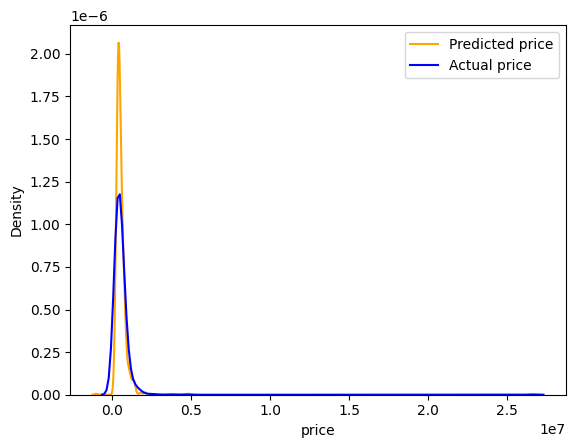

In [26]:
sns.kdeplot(x=Ypred,color="orange",label="Prdicted price")
sns.kdeplot(x=ytest,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

knn

In [23]:
from sklearn.neighbors import NearestNeighbors

In [25]:
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
neigh_dist, neigh_ind = nbrs.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

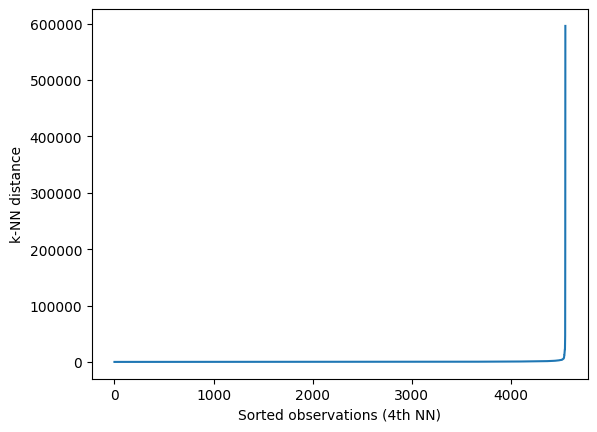

In [26]:
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

LINEAR REGRESSION 

In [28]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

Y_pred = model2.predict(xtest)

In [29]:
model2.intercept_

15037957.613918165

In [30]:
model2.coef_

array([-5.63700093e+04,  7.76063700e+04,  2.63018998e+02, -7.53714197e-01,
        2.73962214e+04,  5.98307779e+05,  5.38161914e+04,  2.94934405e+04,
       -4.29809118e+01, -2.68848046e+03,  5.58438290e+00, -1.00494023e+02])

In [31]:
# Evalutions
from sklearn import metrics

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(ytest, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(ytest, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(ytest, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(ytest, Y_pred))

Mean Absolute Error     :  157032.2592418195
Mean Squared Error      :  60748948770.8058
Root Mean Squared Error :  246473.0183423853
R2 Score                :  0.5289214704566552
